In [1]:
from geom3d.train_models import *
import torch
import copy
from geom3d.utils import fragment_scaffold_split
from geom3d.utils import database_utils
import os
import torch
from torch_geometric.data import Data

dataset = torch.load('/rds/general/user/cb1319/home/GEOM3D/Geom3D/datasets/80000dataset_combined.pt')
os.chdir('/rds/general/user/cb1319/home/GEOM3D/Geom3D/')
config_dir = os.getcwd()+"/fragment_experiment/SchNet_opt_combined_80000"
config = read_config(config_dir)

config loaded from /rds/general/user/cb1319/home/GEOM3D/Geom3D/fragment_experiment/SchNet_opt_combined_80000


In [3]:
from geom3d.utils import database_utils
from pathlib import Path

df_path = Path(
    '/rds/general/user/cb1319/home/GEOM3D/STK_path/', "data/output/Full_dataset/",  "df_total_subset_16_11_23.csv"
)
df_precursors_path = Path(
    '/rds/general/user/cb1319/home/GEOM3D/STK_path/',
    "data/output/Prescursor_data/",
    "calculation_data_precursor_071123_clean.pkl",
)

print(f"Loading data from {df_path} and {df_precursors_path}")

df_total, df_precursors = database_utils.load_data_from_file(
    df_path, df_precursors_path
)

Loading data from /rds/general/user/cb1319/home/GEOM3D/STK_path/data/output/Full_dataset/df_total_subset_16_11_23.csv and /rds/general/user/cb1319/home/GEOM3D/STK_path/data/output/Prescursor_data/calculation_data_precursor_071123_clean.pkl


In [19]:
df_path_2 = Path(
    '/rds/general/user/cb1319/home/GEOM3D/STK_path/', "data/output/Full_dataset/",  "df_total_subset_16_11_23_v2.csv"
)
df_total_2 = pd.read_csv(df_path_2)

In [25]:
# find how many objects are in whcih cluster from 'Cluster' column
cluster_counts = df_total_2['Cluster'].value_counts()

cluster_counts

Cluster
 4    34113
-1    22833
 0    10211
 2     6092
-3     3344
 3     2955
 1     1827
 5      829
Name: count, dtype: int64

In [21]:
%matplotlib inline

In [12]:
import importlib
from geom3d.utils import oligomer_scaffold_split
from geom3d.utils.oligomer_scaffold_split import *

importlib.reload(oligomer_scaffold_split)

cluster_assignments = cluster_analysis(dataset, config, min_cluster_size=100, min_samples=50)

print(cluster_assignments)

Loading data from /rds/general/user/cb1319/home/GEOM3D/STK_path/data/output/Full_dataset/df_total_subset_16_11_23_v2.csv and /rds/general/user/cb1319/home/GEOM3D/STK_path/data/output/Prescursor_data/calculation_data_precursor_071123_clean.pkl
Dataset file found in df_total
Clustering with min_cluster_size = 100 and min_samples = 50
Number of clusters: 4
Number of oligomers in each cluster:
Cluster
 0    61526
 1    16825
-3     3344
-1      509
Name: count, dtype: int64
None


In [14]:
%matplotlib inline

Loading data from /rds/general/user/cb1319/home/GEOM3D/STK_path/data/output/Full_dataset/df_total_subset_16_11_23_v2.csv and /rds/general/user/cb1319/home/GEOM3D/STK_path/data/output/Prescursor_data/calculation_data_precursor_071123_clean.pkl
Dataset file found in df_total
Clustering with min_cluster_size = 150 and min_samples = 5


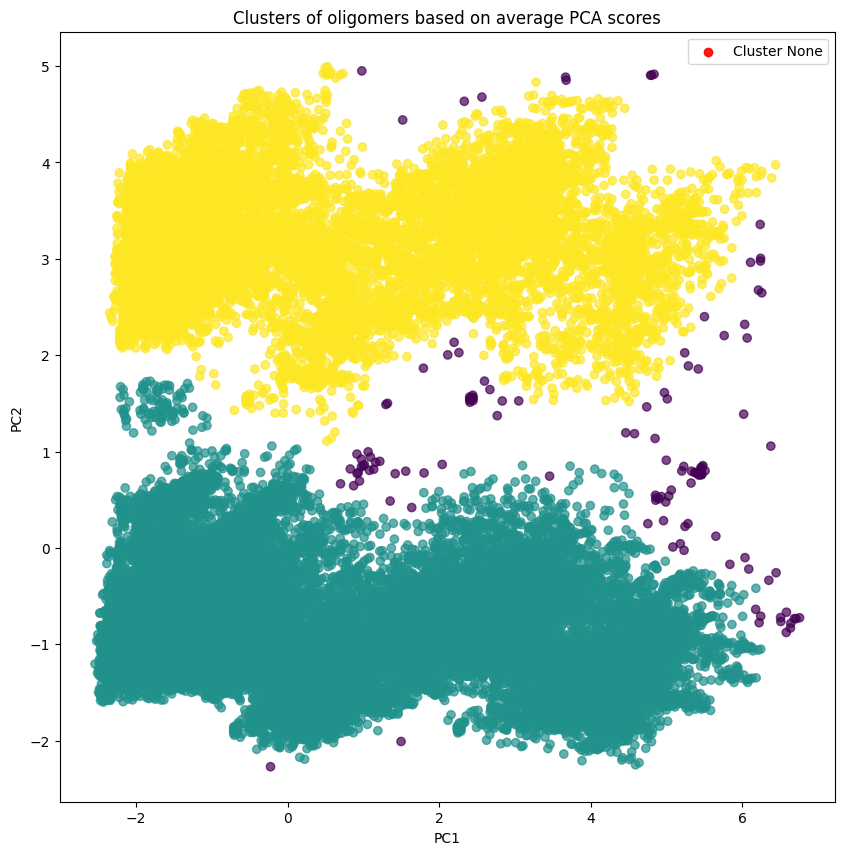

In [36]:
import importlib
from geom3d.utils import oligomer_scaffold_split
from geom3d.utils.oligomer_scaffold_split import *

importlib.reload(oligomer_scaffold_split)

config["oligomer_min_cluster_size"] = 150
config["oligomer_min_samples"] =  5
config["oligomer_alpha"] = 0.5
config['oligomer_cluster_selection_epsilon'] = 0.1
config['oligomer_cluster_selection_method'] = 'eom'
config['oligomer_metric'] = 'euclidean'
config["test_set_oligomer_cluster"] = None

pca_plot(dataset, config)

Loading data from /rds/general/user/cb1319/home/GEOM3D/STK_path/data/output/Full_dataset/df_total_subset_16_11_23_v2.csv and /rds/general/user/cb1319/home/GEOM3D/STK_path/data/output/Prescursor_data/calculation_data_precursor_071123_clean.pkl
Dataset file found in df_total


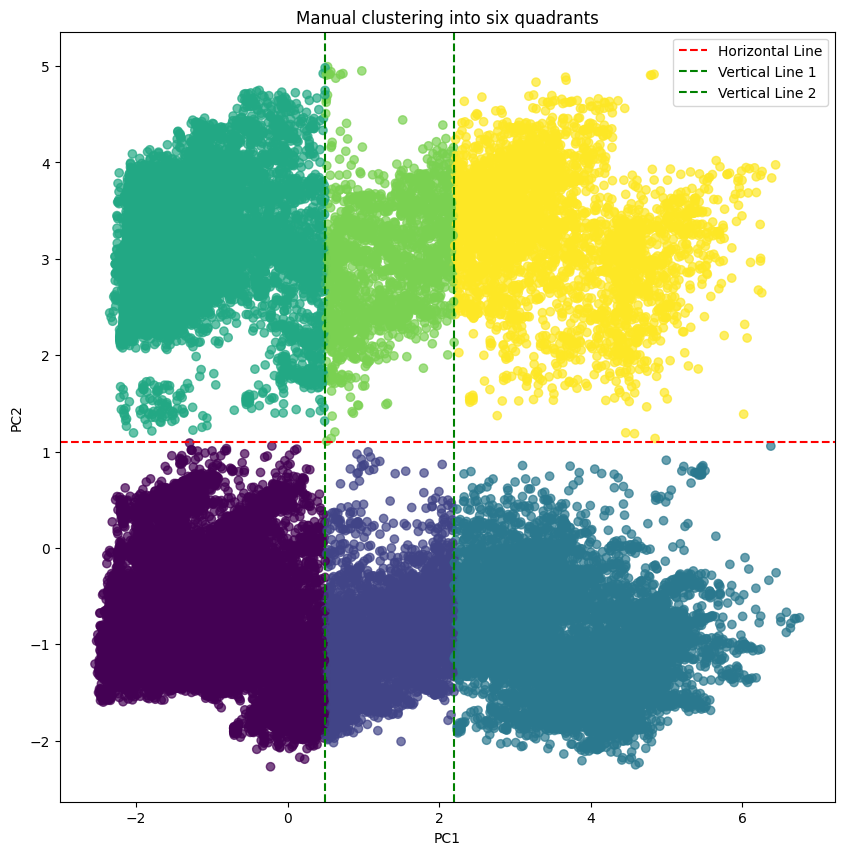

In [40]:
horizontal_line_y = 1.1
vertical_line_x1 = 0.5
vertical_line_x2 = 2.2
df_clustered = manual_cluster(dataset, config, horizontal_line_y, vertical_line_x1, vertical_line_x2)

In [3]:
import importlib
from geom3d.utils import oligomer_scaffold_split
from geom3d.utils.oligomer_scaffold_split import *

importlib.reload(oligomer_scaffold_split)

config["manual_cluster_horizontal_line_y"] = 1.1
config["manual_cluster_vertical_line_x1"] = 0.5
config["manual_cluster_vertical_line_x2"] = 2.2

df_total_2 = cluster_analysis(dataset, config)

print(df_total_2['Cluster'].value_counts())

Loading data from /rds/general/user/cb1319/home/GEOM3D/STK_path/data/output/Full_dataset/df_total_subset_16_11_23_v2.csv and /rds/general/user/cb1319/home/GEOM3D/STK_path/data/output/Prescursor_data/calculation_data_precursor_071123_clean.pkl
Dataset file found in df_total
Number of oligomers in each cluster:
Cluster
1    42926
3    13254
4    11471
6     7315
2     5478
5     1760
Name: count, dtype: int64


In [13]:
print(config['dataset_path'])

In [13]:
import importlib
from geom3d.utils import smart_data_split
from geom3d.utils.smart_data_split import *

importlib.reload(smart_data_split)

config['smart_dataset_size'] = 5000
smart_dataset = smart_data_splitter(dataset, config)

Loading data from /rds/general/user/cb1319/home/GEOM3D/STK_path/data/output/Full_dataset/df_total_subset_16_11_23_v2.csv and /rds/general/user/cb1319/home/GEOM3D/STK_path/data/output/Prescursor_data/calculation_data_precursor_071123_clean.pkl
Dataset file found in df_total
Number of oligomers in each cluster:
Cluster counts: Cluster
1    42926
3    13254
4    11471
6     7315
2     5478
5     1760
Name: count, dtype: int64
Total samples added: 5000
Smart dataset size: 5000
Train set size: 3998
Validation set size: 498
Test set size: 504


In [5]:
df_total = cluster_analysis(dataset, config)


Loading data from /rds/general/user/cb1319/home/GEOM3D/STK_path/data/output/Full_dataset/df_total_subset_16_11_23_v2.csv and /rds/general/user/cb1319/home/GEOM3D/STK_path/data/output/Prescursor_data/calculation_data_precursor_071123_clean.pkl
Dataset file found in df_total
Number of oligomers in each cluster:


In [12]:
# check if the InChIKey is in dataset.InChIKey
dataset_InChIKeys = [data['InChIKey'] for data in dataset]
dataset_InChIKeys = set(dataset_InChIKeys)

dataset_InChIKeys

{'LRHFIEBGTBJCAP-DGFWLPPZSA-N',
 'PFPUZBJKZZERTH-UHFFFAOYSA-N',
 'MGPYXMKIDDUZDV-UHFFFAOYSA-N',
 'PIUMDRIPMYMIHT-QHTHOUCHSA-N',
 'NHQZFTQPAOLSIY-YUIFKNFPSA-N',
 'GPYJICGAFGIXTP-UHFFFAOYSA-N',
 'PLTYURNKEXDVCF-UHFFFAOYSA-N',
 'XJEQGHVRYDKCQU-UHFFFAOYSA-N',
 'VLOXYSRCLNYXQE-WIMUOEIGSA-N',
 'HPEWEZFXOKTQHZ-UHFFFAOYSA-N',
 'GGJHKWWSYCMAHH-PTFKWQKOSA-N',
 'GLAAKSDRQTYYAX-UHFFFAOYSA-N',
 'UYWHZZYYVSECKJ-OLAQIDGISA-N',
 'XEULVPVBQYUZBO-UHFFFAOYSA-N',
 'VQKXVGJKTUVPIS-UHFFFAOYSA-N',
 'BRCWCZIDQRQDDI-UHFFFAOYSA-N',
 'XOMDFSFEDLEMTR-YRJKAGBCSA-N',
 'MNNLQGXBVXNOKG-UHFFFAOYSA-N',
 'PGLAQKLVWQCLKC-YKQZZPSBSA-N',
 'DSWGKYQWDXUCOD-MOINJFGNSA-N',
 'DEHAJKXEPUUAFC-UHFFFAOYSA-N',
 'FZLBJXJFYHAOAV-UHFFFAOYSA-N',
 'AMNIEILZZGHOCA-ZWDLKYPRSA-N',
 'UIFATGITSZZVGD-YFEQDRJUSA-N',
 'RTLDMPCIAVFIQQ-UHFFFAOYSA-N',
 'XCIFHCKBAXXQFV-ZQFRHMSGSA-N',
 'PSPDIGCVYXUDDL-UHFFFAOYSA-N',
 'BMOLORRQYBLUIH-UHFFFAOYSA-N',
 'UBIDXHDNIRJKCL-FPWVPGCSSA-N',
 'XIUZLQJKGUULRB-BIXFWJSBSA-N',
 'XUKZMIJYUKAKEA-UHFFFAOYSA-N',
 'QFOPIM

In [21]:
import random

smart_dataset_size = 5000

smart_dataset_keys = []

# Get the value counts of the 'Cluster' column to determine the number of oligomers in each cluster
cluster_counts = df_total['Cluster'].value_counts()
dataset_InChIKeys = set([data['InChIKey'] for data in dataset])
print(f'Cluster counts: {cluster_counts}')

# take the rows of the dataframe that have InChIKeys that are in the dataset_InChIKeys
df_total = df_total[df_total['InChIKey'].isin(dataset_InChIKeys)]

# Initialize a counter to keep track of the total number of samples added
total_samples_added = 0
# iterate through each cluster in the dataframe, and make a list of InChIKeys that has an equal amount of samples from each cluster, and randomly sample from the list for the % of smart_dataset_size / number of clusters
for cluster in cluster_counts.index:
    # Get the InChIKeys of the samples in the current cluster
    cluster_samples = df_total[df_total['Cluster'] == cluster]
    cluster_samples = cluster_samples.sample(frac=1)
    cluster_samples = cluster_samples.reset_index(drop=True)
    cluster_samples = cluster_samples.head(int(smart_dataset_size / len(cluster_counts)))
    # Add the InChIKeys to the smart_dataset_keys list if the InChIKey is present in the dataset and is not already in the list
    if cluster_samples['InChIKey'].isin(dataset_InChIKeys).all():
        smart_dataset_keys.extend(cluster_samples['InChIKey'])
        total_samples_added += len(cluster_samples)

if total_samples_added < smart_dataset_size:
    # add random samples from the dataset to the smart_dataset_keys list until the smart_dataset_keys list has the desired number of samples
    random_samples = sorted(dataset_InChIKeys, key=lambda x: random.random())[:smart_dataset_size - total_samples_added]
    if random_samples not in smart_dataset_keys:
        smart_dataset_keys.extend(random_samples)
        total_samples_added += len(random_samples)

print(f'Total samples added: {total_samples_added}')
print(f'Smart dataset size: {len(smart_dataset_keys)}')

test_idx = [i for i, data in enumerate(dataset) if data['InChIKey'] in smart_dataset_keys]
print(f'Test idx: {test_idx}')


# # Filter the original dataset to include only samples whose InChIKeys are in smart_dataset_keys
# filtered_indices = [idx for idx, data in enumerate(dataset) if data['InChIKey'] in smart_dataset_keys]
# smart_dataset = torch.utils.data.Subset(dataset, filtered_indices)
# print(f'Smart dataset size: {len(smart_dataset)}')

Cluster counts: Cluster
1    41760
3    12915
4    11160
6     7117
2     5331
5     1717
Name: count, dtype: int64
Total samples added: 5000
Smart dataset size: 5000


KeyboardInterrupt: 